# Neural networks in Python using Scikit Learn

* We will be using an implementation of Multilayer Perceptron from scikit-learn
* Documentation: http://scikit-learn.org/stable/modules/neural_networks_supervised.html
* This implementation consists of two classes:
 * `MLPRegressor` for regression
 * `MLPClassifier` for classification

In [37]:
%matplotlib inline
from sklearn.neural_network import MLPRegressor, MLPClassifier

## Regression with neural networks

In [38]:
# We use the example dataset that comes with scikit learn
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


In [39]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [40]:
from enum import Enum
# Associate the name of a feature to its column number
Feature = Enum('Feature', 'CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT MEDV', start=0)

Text(0, 0.5, "Median value of owner-occupied homes in $1000's")

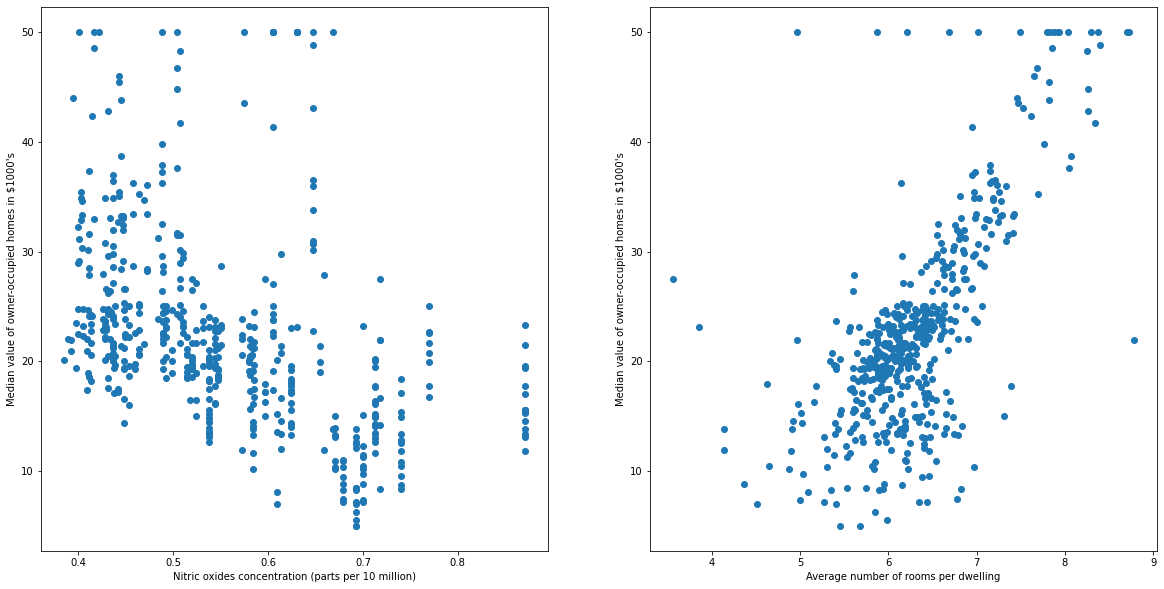

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

nox_concentrations = boston.data[:, Feature.NOX.value]
house_prices = boston.target

ax = plt.subplot(121)
ax.scatter(nox_concentrations, house_prices)
ax.set_xlabel("Nitric oxides concentration (parts per 10 million)")
ax.set_ylabel("Median value of owner-occupied homes in $1000's")

rooms_per_dwelling = boston.data[:, Feature.RM.value]
house_prices = boston.target

ax = plt.subplot(122)
ax.scatter(rooms_per_dwelling, house_prices)
ax.set_xlabel("Average number of rooms per dwelling")
ax.set_ylabel("Median value of owner-occupied homes in $1000's")

In [42]:
# Split into training and testing set
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array([rooms_per_dwelling, nox_concentrations]).T
y = house_prices
print("Dataset shape (X, y): ", X.shape, y.shape)
## Split the data into a testing and training set (20% of the data for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Training set shape (X, y): ", X_train.shape, y_train.shape)

Dataset shape (X, y):  (506, 2) (506,)
Training set shape (X, y):  (404, 2) (404,)


In [43]:
## Initialize the neural network
# Important parameters -- activation, solver, alpha, hidden_layer_sizes, max_iter, 
#                         random_state, warm_start, early_stopping

n_hidden_neurons = 20
nn = MLPRegressor(activation='logistic', solver='lbfgs', # max_iter=5000,
                      hidden_layer_sizes=(n_hidden_neurons,), random_state=1)
nn  

MLPRegressor(activation='logistic', hidden_layer_sizes=(20,), random_state=1,
             solver='lbfgs')

In [44]:
## Train the network
nn.fit(X_train, y_train)

MLPRegressor(activation='logistic', hidden_layer_sizes=(20,), random_state=1,
             solver='lbfgs')

In [45]:
## Calculate and print the MSE
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, nn.predict(X_train))
test_mse = mean_squared_error(y_test, nn.predict(X_test))
print("Training MSE:", train_mse)
print("Testing MSE: ", test_mse)

Training MSE: 28.722462486339698
Testing MSE:  24.65916021246593


In [46]:
## Predict the house prices for the entire data set
predictions = nn.predict(X)

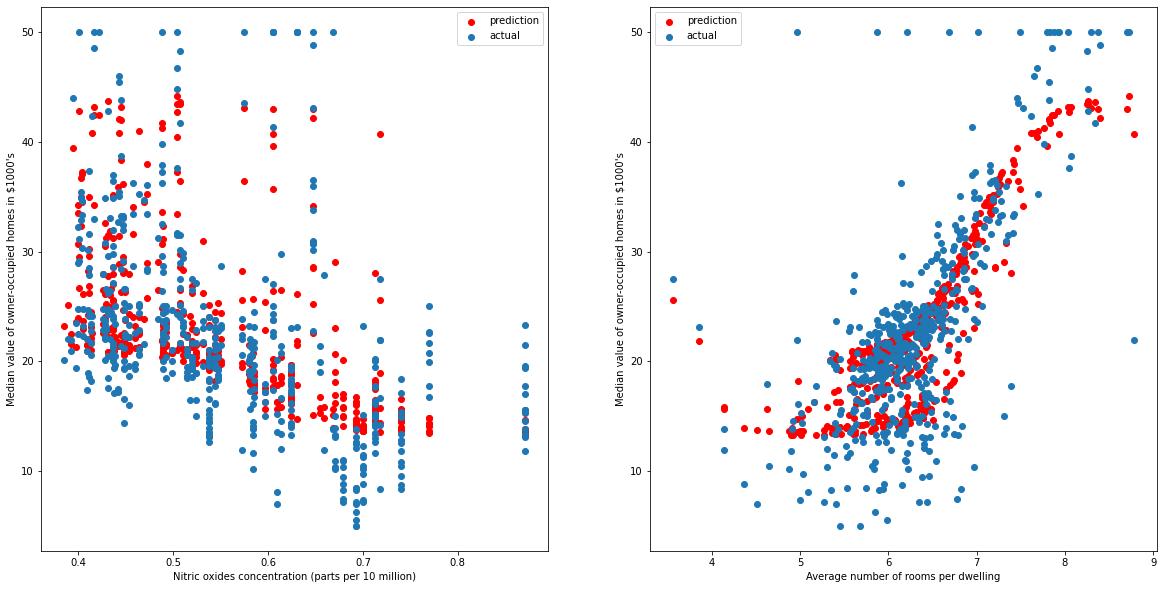

In [47]:
## Plot network predictions and actual values
plt.figure(figsize=(20,10))

house_prices_prediction = predictions
house_prices_actual = boston.target

nox_concentrations = boston.data[:, Feature.NOX.value]

ax = plt.subplot(121)
ax.scatter(nox_concentrations, house_prices_prediction, color='r', label='prediction')
ax.scatter(nox_concentrations, house_prices_actual, label='actual')
ax.set_xlabel("Nitric oxides concentration (parts per 10 million)")
ax.set_ylabel("Median value of owner-occupied homes in $1000's")
plt.legend()

rooms_per_dwelling = boston.data[:, Feature.RM.value]

ax = plt.subplot(122)
ax.scatter(rooms_per_dwelling, house_prices_prediction, color='r', label='prediction')
ax.scatter(rooms_per_dwelling, house_prices_actual, label='actual')

ax.set_xlabel("Average number of rooms per dwelling")
ax.set_ylabel("Median value of owner-occupied homes in $1000's")
plt.legend()

### Experiment with parameters

Training MSE: 28.722462486339698
Testing MSE:  24.65916021246593


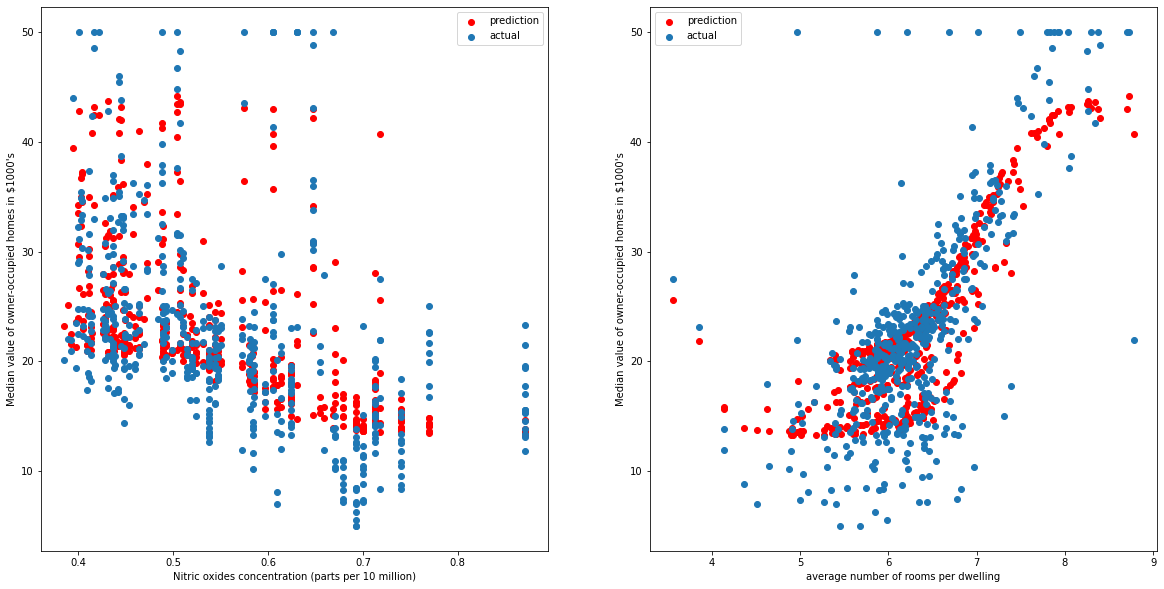

In [58]:
# Experiment with n_hidden_neurons, solver, activation, max_iter

## Initialize the neural network
n_hidden_neurons = 20 #100 # 1 # 4 # 20
nn = MLPRegressor(activation='logistic', solver='lbfgs', # max_iter=200,
                  hidden_layer_sizes=(n_hidden_neurons,), random_state=1)

## Train the network
nn.fit(X_train, y_train)

## Calculate and print the MSE
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, nn.predict(X_train))
test_mse = mean_squared_error(y_test, nn.predict(X_test))
print("Training MSE:", train_mse)
print("Testing MSE: ", test_mse)

## Predict the house prices for the entire data set
predictions = nn.predict(X)

## Plot network predictions and actual values
plt.figure(figsize=(20,10))

house_prices_prediction = predictions
house_prices_actual = boston.target

nox_concentrations = boston.data[:, Feature.NOX.value]

ax = plt.subplot(121)
ax.scatter(nox_concentrations, house_prices_prediction, color='r', label='prediction')
ax.scatter(nox_concentrations, house_prices_actual, label='actual')
ax.set_xlabel("Nitric oxides concentration (parts per 10 million)")
ax.set_ylabel("Median value of owner-occupied homes in $1000's")
plt.legend()

rooms_per_dwelling = boston.data[:, Feature.RM.value]

ax = plt.subplot(122)
ax.scatter(rooms_per_dwelling, house_prices_prediction, color='r', label='prediction')
ax.scatter(rooms_per_dwelling, house_prices_actual, label='actual')

ax.set_xlabel("average number of rooms per dwelling")
ax.set_ylabel("Median value of owner-occupied homes in $1000's")
plt.legend()

## Warm start

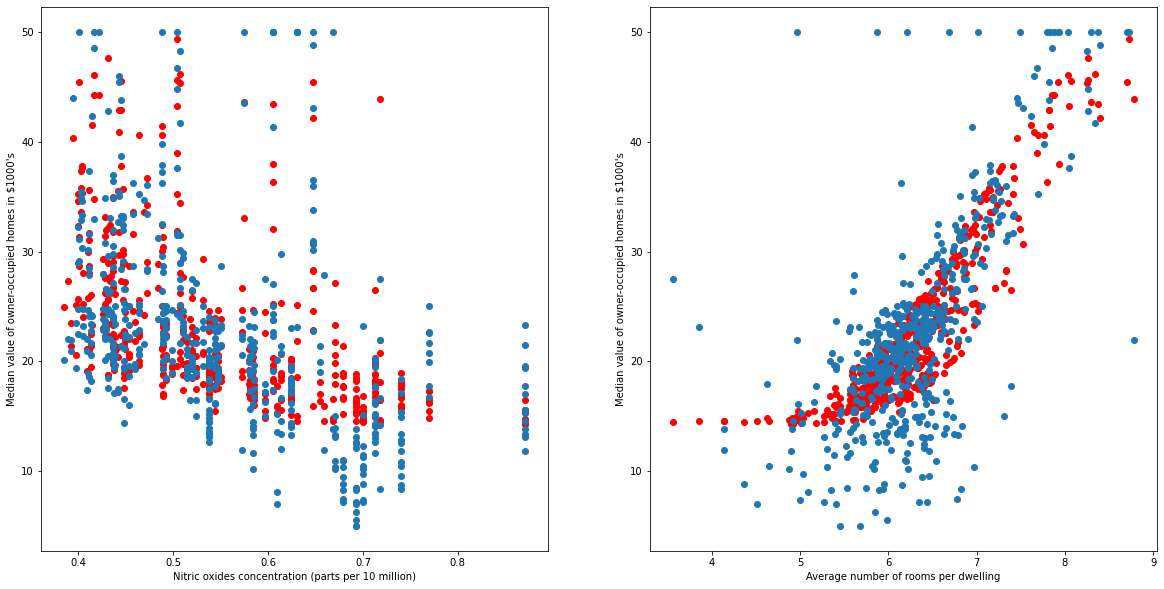

In [59]:
from IPython import display
from sklearn.metrics import mean_squared_error


## Initialize the neural network
n_hidden_neurons = 20
max_iter = 1500
nn = MLPRegressor(activation='logistic', solver='lbfgs',
                      hidden_layer_sizes=(n_hidden_neurons,), random_state=1, warm_start=True, max_iter=1)

x = []
arr_train_mse = [] # Check the attributes of MLPRegressor (e.g., loss_curve_)
arr_test_mse = []

fig = plt.figure(figsize=(20,10))
for i in range(max_iter):
    ## Train the network
    nn.fit(X_train, y_train)
    
    if i < 10 or i % 50 == 0 or i == max_iter - 1:

        ## Calculate and print the MSE
        
        train_mse = mean_squared_error(y_train, nn.predict(X_train))
        test_mse = mean_squared_error(y_test, nn.predict(X_test))
        
        arr_train_mse.append(train_mse) 
        arr_test_mse.append(test_mse)
        x.append(i)
        
        print("Iteration:", i)
        print("Training MSE:", train_mse)
        print("Testing MSE: ", test_mse)

        ## Predict the house prices for the entire data set
        predictions = nn.predict(X)

        ## Plot network predictions and actual values
        display.clear_output(wait=True)
        
        house_prices_prediction = predictions
        house_prices_actual = boston.target

        nox_concentrations = boston.data[:, Feature.NOX.value]

        ax = plt.subplot(121)
        plt.gca().cla() 
        ax.scatter(nox_concentrations, house_prices_prediction, color='r', label='prediction')
        ax.scatter(nox_concentrations, house_prices_actual, label='actual')
        ax.set_xlabel("Nitric oxides concentration (parts per 10 million)")
        ax.set_ylabel("Median value of owner-occupied homes in $1000's")

        rooms_per_dwelling = boston.data[:, Feature.RM.value]

        ax = plt.subplot(122)
        plt.gca().cla() 
        ax.scatter(rooms_per_dwelling, house_prices_prediction, color='r', label='prediction')
        ax.scatter(rooms_per_dwelling, house_prices_actual, label='actual')

        ax.set_xlabel("Average number of rooms per dwelling")
        ax.set_ylabel("Median value of owner-occupied homes in $1000's")
        
        display.display(plt.gcf())
display.clear_output(wait=True)

Text(0.5, 1.0, 'MSE over iteration')

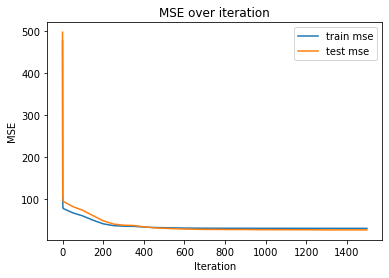

In [60]:
plt.plot(x, arr_train_mse, label='train mse')
plt.plot(x, arr_test_mse, label='test mse')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE over iteration')